# Exploring Dandiset 001335: Neuropixels Recordings from Hippocampus of head-fixed mice during odor presentation

**Important:** This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Use caution when interpreting the code or results.

## Overview of the Dandiset

This Dandiset contains Neuropixels recordings from the hippocampus of head-fixed mice during odor presentation. Head-fixed wild type mice were presented with various odor sequences, as neural activity was recorded from hippocampus using Neuropixels probes.

See the Dandiset on Neurosift: https://neurosift.app/dandiset/001335

## What this notebook will cover

This notebook demonstrates how to load and visualize data from this Dandiset. We will:

1.  Connect to the DANDI archive and load the Dandiset metadata.
2.  Load LFP data from an NWB file and plot a segment of the data.
3.  Load spike times from the units table and plot a histogram of spike times.

## Required Packages

The following packages are required to run this notebook:

*   pynwb
*   h5py
*   remfile
*   matplotlib
*   numpy

## Loading the Dandiset

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001335")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 1 assets in the dataset
\nFirst 5 assets:
- sub-M541/sub-M541_ecephys.nwb


## Loading and Visualizing LFP Data

The Dandiset contains one NWB file. We will load the LFP data from this file and plot a small segment of the data for a few electrodes.

The NWB file is located at `sub-M541/sub-M541_ecephys.nwb` and can be accessed using the following URL: https://api.dandiarchive.org/api/assets/aca66db7-4c02-4453-8dcb-a179d44b1c5d/download/

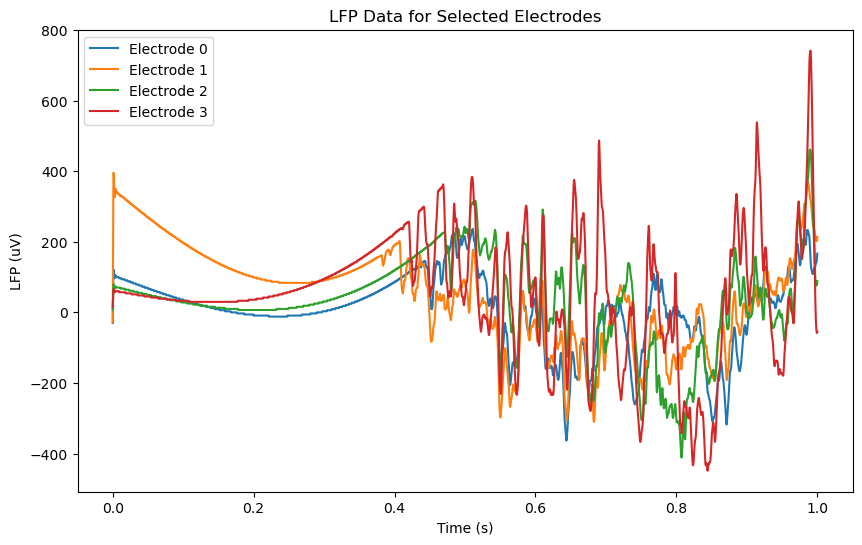

In [2]:
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np

# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/aca66db7-4c02-4453-8dcb-a179d44b1c5d/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Get LFP data
lfp_data = nwb.processing["ecephys"].data_interfaces["LFP"].data
lfp_rate = nwb.processing["ecephys"].data_interfaces["LFP"].rate
electrodes_table = nwb.processing["ecephys"].data_interfaces["LFP"].electrodes.table

# Select a subset of electrodes (e.g., the first 4)
electrode_ids = electrodes_table.id[:4]  # Get the first 4 electrode IDs
selected_electrode_indices = np.where(np.isin(electrodes_table.id[:], electrode_ids))[0] # Find the indices of selected electrodes

# Select a time window (e.g., the first 1 second)
start_time = 0
end_time = 1
start_index = int(start_time * lfp_rate)
end_index = int(end_time * lfp_rate)

# Load the LFP data for the selected electrodes and time window
lfp_data_subset = lfp_data[start_index:end_index, selected_electrode_indices]

# Create a time axis
time_axis = np.linspace(start_time, end_time, end_index - start_index)

# Plot the LFP data
plt.figure(figsize=(10, 6))
for i, electrode_index in enumerate(selected_electrode_indices):
    plt.plot(time_axis, lfp_data_subset[:, i] + i*20 , label=f"Electrode {electrodes_table.id[electrode_index]}") # the i*20 is used to vertically space the signals

plt.xlabel("Time (s)")
plt.ylabel("LFP (uV)")
plt.title("LFP Data for Selected Electrodes")
plt.legend()
plt.show()

The plot above shows the LFP data for the first 4 electrodes over the first second of the recording. The LFP signals for each electrode are vertically offset for clarity. The approximate range of the data is -450 uV to 750 uV.

## Loading and Visualizing Spike Times

Now we will load the spike times from the units table and plot a histogram of spike times.

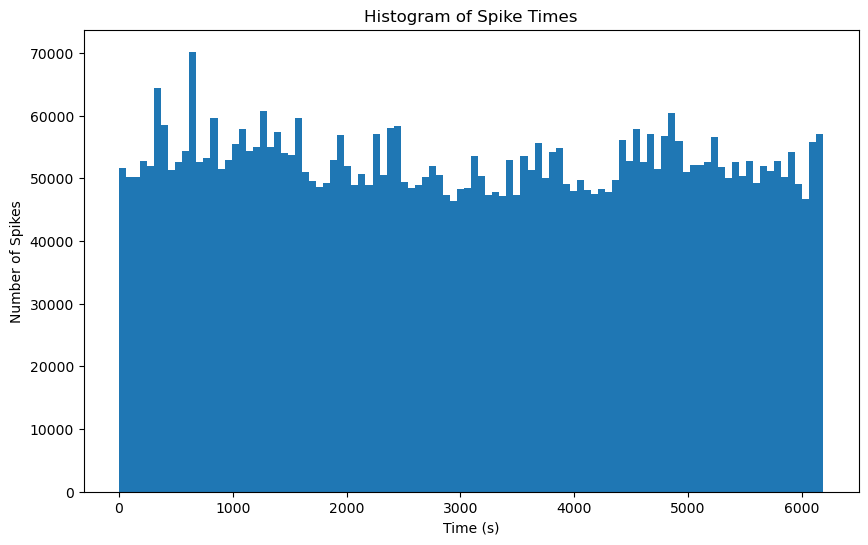

In [3]:
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np

# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/aca66db7-4c02-4453-8dcb-a179d44b1c5d/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Get spike times from the units table
units_table = nwb.units
unit_ids = units_table.id[:]

# Collect spike times for each unit
all_spike_times = []
for i, unit_id in enumerate(unit_ids):
    spike_times = nwb.units['spike_times'][i]
    if isinstance(spike_times, np.ndarray) and len(spike_times) > 0: # Check if spike_times is an array and not empty
      all_spike_times.extend(spike_times)

# Convert to numpy array
all_spike_times = np.array(all_spike_times)

# Plot a histogram of the spike times
plt.figure(figsize=(10, 6))
plt.hist(all_spike_times, bins=100)
plt.xlabel("Time (s)")
plt.ylabel("Number of Spikes")
plt.title("Histogram of Spike Times")
plt.show()

The plot above shows the distribution of spike times across the recording. The x-axis represents time in seconds, and the y-axis represents the number of spikes. The spike times range from approximately 0 to 6200 seconds.

## Summary and Future Directions

This notebook demonstrated how to load and visualize data from Dandiset 001335, including LFP data and spike times. Possible future directions for analysis include:

*   Analyzing the relationship between LFP data and spike times.
*   Investigating the effects of odor presentation on neural activity.
*   Performing more advanced signal processing techniques on the LFP data.